## Importing


In [1]:

# Basic imports
import pandas as pd
import numpy as np



from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import joblib


## Load Data

In [2]:

# Load dataset
df_train = pd.read_csv("../data/fraudTrain.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
df_train.describe(include='object')

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,1274791,693,14,352,481,2,983,894,51,494,968,1296675
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1


In [7]:
df_train.value_counts()

Unnamed: 0  trans_date_trans_time  cc_num               merchant                             category      amt     first     last       gender  street                            city            state  zip    lat      long       city_pop  job                                                dob         trans_num                         unix_time   merch_lat  merch_long   is_fraud
0           2019-01-01 00:00:18    2703186189652095     fraud_Rippin, Kub and Mann           misc_net      4.97    Jennifer  Banks      F       561 Perry Cove                    Moravian Falls  NC     28654  36.0788  -81.1781   3495      Psychologist, counselling                          1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   0           1
864447      2019-12-18 17:05:38    371226440126102      fraud_Barton LLC                     kids_pets     31.49   Stacy     Lambert    F       85430 Julie Trafficway Suite 792  Mulberry Grove  IL     62262  38.9311  -89.2463   1810   

In [8]:
df_train['is_fraud'].value_counts(normalize=True)

is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64

In [9]:
df_train.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [10]:
df_train.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
df_train.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

## EDA

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

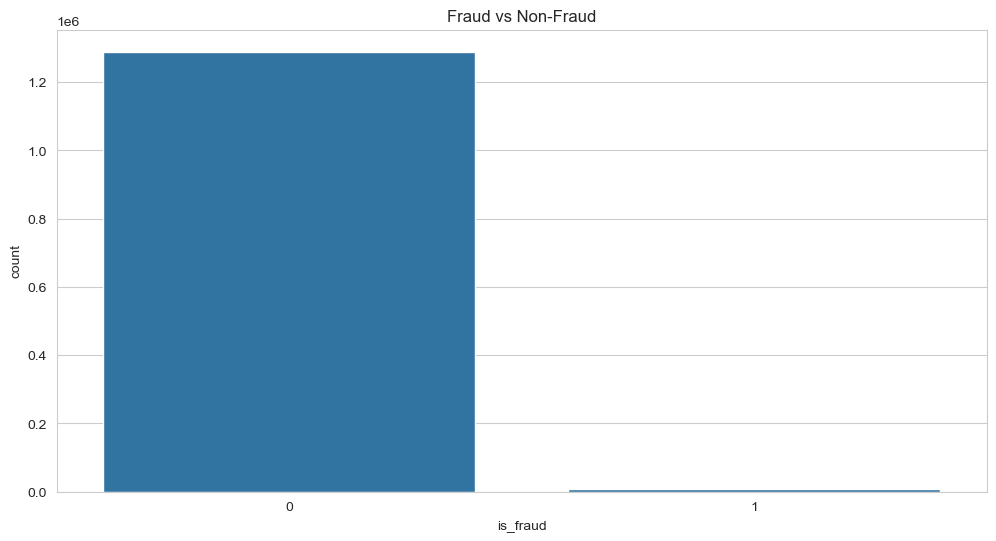

In [14]:
sns.countplot(x='is_fraud', data=df_train)
plt.title("Fraud vs Non-Fraud")
plt.show()

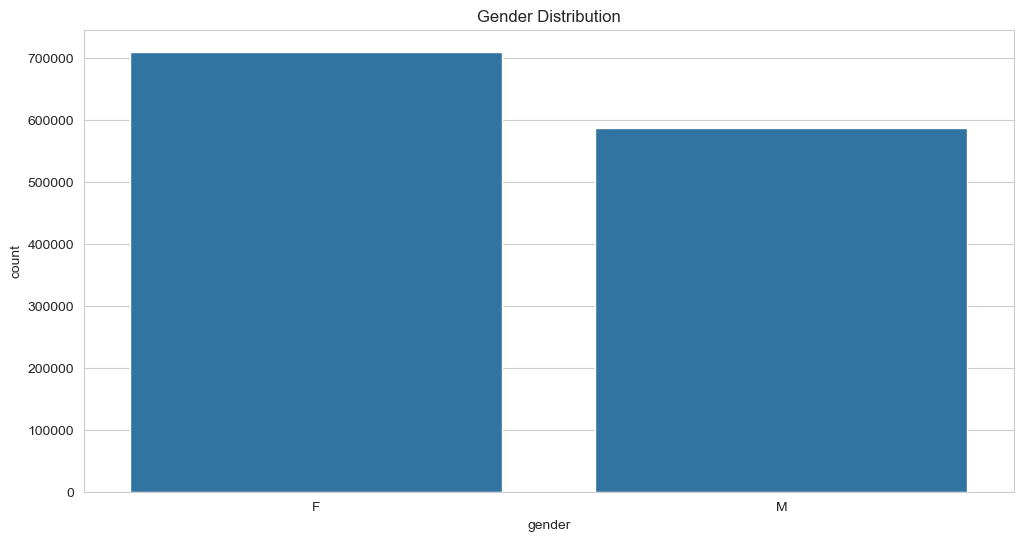

In [15]:
sns.countplot(x='gender', data=df_train)
plt.title("Gender Distribution")
plt.show()

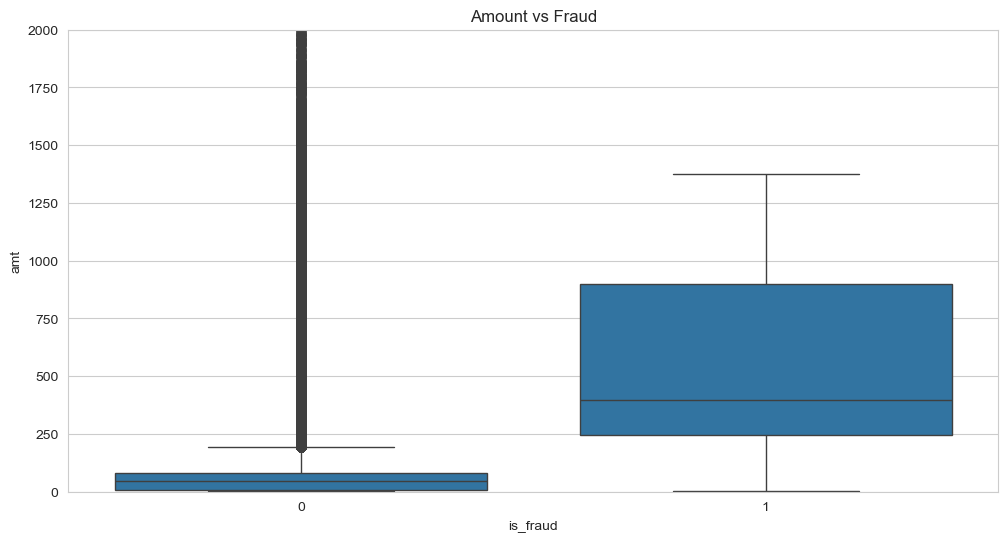

In [16]:
sns.boxplot(x='is_fraud', y='amt', data=df_train)
plt.title("Amount vs Fraud")
plt.ylim(0, 2000)
plt.show()

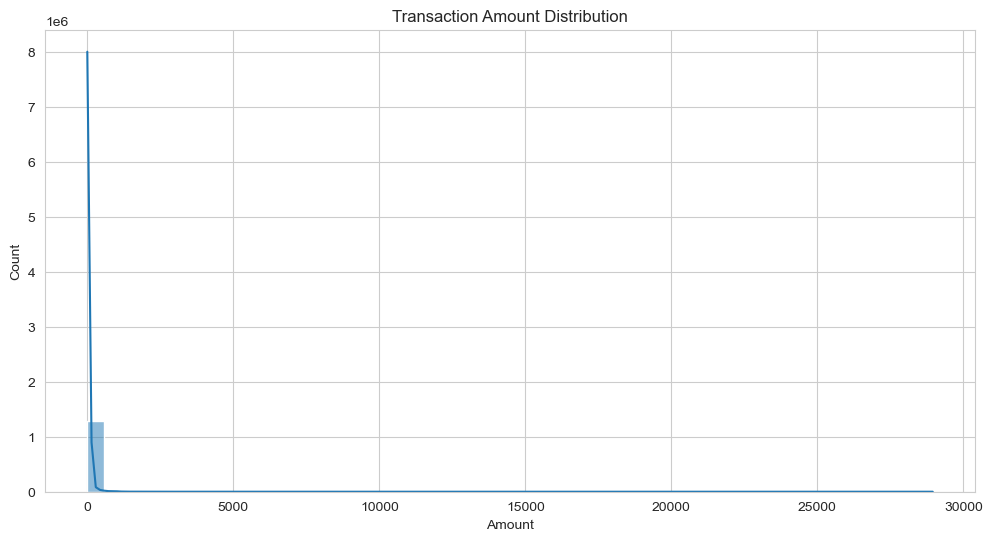

In [17]:
sns.histplot(df_train['amt'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.show()

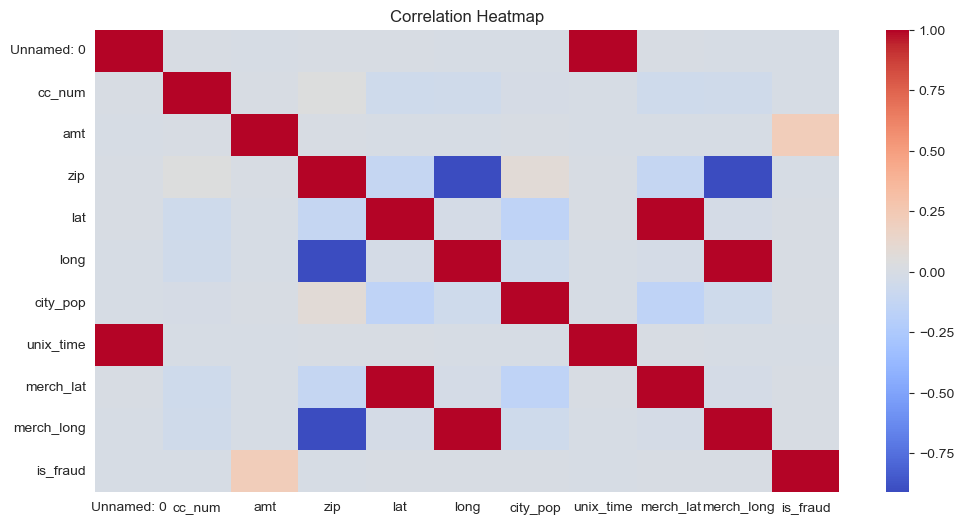

In [18]:
# Correlation heatmap
sns.heatmap(df_train.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

## Preprocessing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Convert transaction time
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])

# Extract hour and day of week
df_train['hour'] = df_train['trans_date_trans_time'].dt.hour
df_train['dayofweek'] = df_train['trans_date_trans_time'].dt.dayofweek

df_train['dob'] = pd.to_datetime(df_train['dob'])
df_train['age'] = (df_train['trans_date_trans_time'].dt.year - df_train['dob'].dt.year)
df_train = df_train.drop(columns=['trans_date_trans_time', 'dob', 'cc_num', 'first', 'last',
             'street', 'city', 'state', 'zip', 'lat', 'long', 'job', 'trans_num'])


X = df_train.drop(columns=['is_fraud'])
y = df_train['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Features
numeric_features = ['amt', 'city_pop', 'unix_time', 'hour']
categorical_features = ['category', 'gender']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

# Processed
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


## Model Training

In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


models = {
    "RF": RandomForestClassifier(class_weight='balanced', random_state=42),
    "GB": GradientBoostingClassifier(),
    "LR": LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)
}

for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    y_proba = model.predict_proba(X_test_processed)[:, 1]
    
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Macro:", f1_score(y_test, y_pred, average='macro'))
    print("F1 Weighted:", f1_score(y_test, y_pred, average='weighted'))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


=== RF ===
Accuracy: 0.9980966717977351
F1 Macro: 0.9088663530778675
F1 Weighted: 0.9979951365155272
ROC-AUC: 0.9824974866800879
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    322285
           1       0.92      0.74      0.82      1884

    accuracy                           1.00    324169
   macro avg       0.96      0.87      0.91    324169
weighted avg       1.00      1.00      1.00    324169



=== GB ===
Accuracy: 0.9967979664927862
F1 Macro: 0.8414446488353506
F1 Weighted: 0.9965665431654877
ROC-AUC: 0.9725608214195828
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    322285
           1       0.80      0.60      0.68      1884

    accuracy                           1.00    324169
   macro avg       0.90      0.80      0.84    324169
weighted avg       1.00      1.00      1.00    324169



=== LR ===
Accuracy: 0.8807751512328

As we can see, RF is better here so we will be using that

                   Feature  Importance
0                      amt    0.583786
3                     hour    0.193948
2                unix_time    0.033124
1                 city_pop    0.032821
6   category_gas_transport    0.023363
8     category_grocery_pos    0.021847
15   category_shopping_net    0.019646
10           category_home    0.010410
5     category_food_dining    0.010092
16   category_shopping_pos    0.008954
12       category_misc_net    0.008556
13       category_misc_pos    0.007177
7     category_grocery_net    0.006739
17         category_travel    0.006633
11      category_kids_pets    0.006553


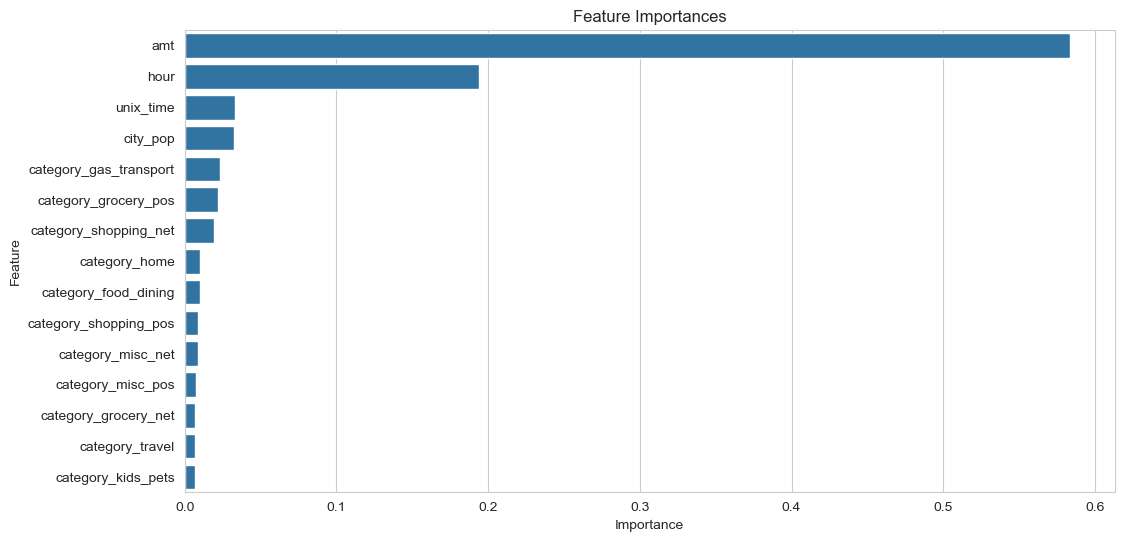

In [21]:

# rf = RandomForestClassifier(class_weight='balanced', random_state=42)
# rf.fit(X_train_processed, y_train)

# Get feature names after preprocessing
feature_names = (numeric_features +
                 list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))

importances = models["RF"].feature_importances_
feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)
print(feat_imp.head(15))


sns.barplot(data=feat_imp.head(15), x="Importance", y="Feature")
plt.title("Feature Importances")
plt.show()


Final pipeline


In [22]:

final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42, n_jobs=-1))
])

final_pipeline.fit(X_train, y_train)

# Save model
joblib.dump(final_pipeline, "fraud_detection_pipeline.pkl")


['fraud_detection_pipeline.pkl']